In [ ]:
import torch
from torch import nn
import matplotlib.pyplot as plt

: 

In [116]:
print(f"System stats")
print(torch.__version__)
device = "cuda" if(torch.cuda.is_available()) else "cpu"
print(f"device: {device}")

System stats
2.7.1+cu128
device: cuda


In [117]:
#Create data
weight=.3
bias=.8
X=torch.arange(1,1000,10).unsqueeze(dim=1).float()
y=X*weight+bias

In [118]:
#split training and testing data
x_train,y_train=X[:int(len(X)*.8)],y[:int(len(X)*.8)]
x_test,y_test=X[int(len(X)*.8):],y[int(len(X)*.8):]
print(f"dataset stats\n Number of train: {len(x_train)} \n Number of test {len(x_test)} \n Total: {len(X)}")

dataset stats
 Number of train: 80 
 Number of test 20 
 Total: 100


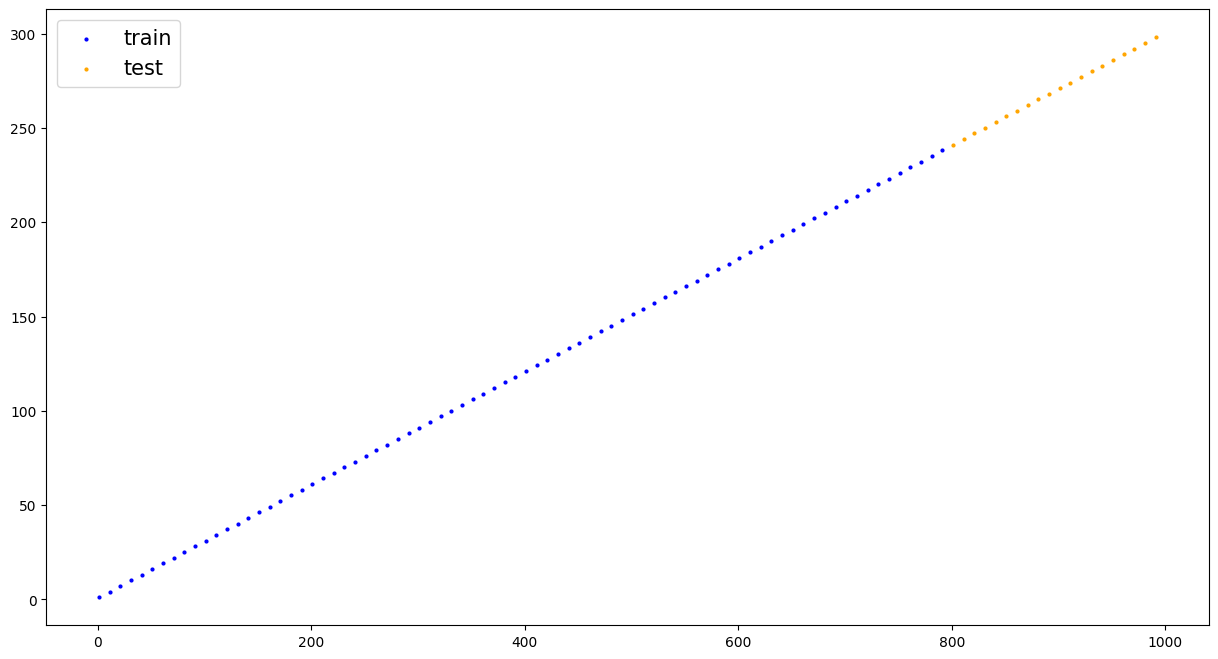

In [119]:
plt.figure(figsize=(15,8))
plt.scatter(x_train,y_train,c="blue",s=4,label="train")
plt.scatter(x_test,y_test,c="orange",s=4,label="test")
plt.legend(prop={"size":15})


In [120]:
class linearlayermodel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear_layer=nn.Linear(in_features=1,
           
                               out_features=1)
    def forward(self,X:torch.Tensor):
        return self.linear_layer(X)

model_1=linearlayermodel()
model_1,model_1.state_dict()

(linearlayermodel(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In [121]:
print(list(model_1.parameters())[0].device)

print(next(model_1.parameters()).device)

cpu
cpu


In [122]:
model_1.to(device)
next(model_1.parameters()).device

device(type='cuda', index=0)

In [123]:
loss_fn=nn.L1Loss()
optimizer = torch.optim.SGD(params=model_1.parameters(), lr=0.000001)
#loss_fn=nn.MSELoss()


In [124]:
torch.manual_seed(42)


Epoch: 0 | Train loss: 183.98726 | Test loss: 415.90170
Epoch: 10 | Train loss: 182.41904 | Test loss: 412.35336
Epoch: 20 | Train loss: 180.85081 | Test loss: 408.80515
Epoch: 30 | Train loss: 179.28259 | Test loss: 405.25684
Epoch: 40 | Train loss: 177.71436 | Test loss: 401.70853
Epoch: 50 | Train loss: 176.14616 | Test loss: 398.16025
Epoch: 60 | Train loss: 174.57793 | Test loss: 394.61197
Epoch: 70 | Train loss: 173.00970 | Test loss: 391.06369
Epoch: 80 | Train loss: 171.44148 | Test loss: 387.51538
Epoch: 90 | Train loss: 169.87328 | Test loss: 383.96710
Epoch: 100 | Train loss: 168.30504 | Test loss: 380.41879
Epoch: 110 | Train loss: 166.73682 | Test loss: 376.87051
Epoch: 120 | Train loss: 165.16859 | Test loss: 373.32224
Epoch: 130 | Train loss: 163.60037 | Test loss: 369.77396
Epoch: 140 | Train loss: 162.03215 | Test loss: 366.22565
Epoch: 150 | Train loss: 160.46391 | Test loss: 362.67737
Epoch: 160 | Train loss: 158.89569 | Test loss: 359.12909
Epoch: 170 | Train loss: 

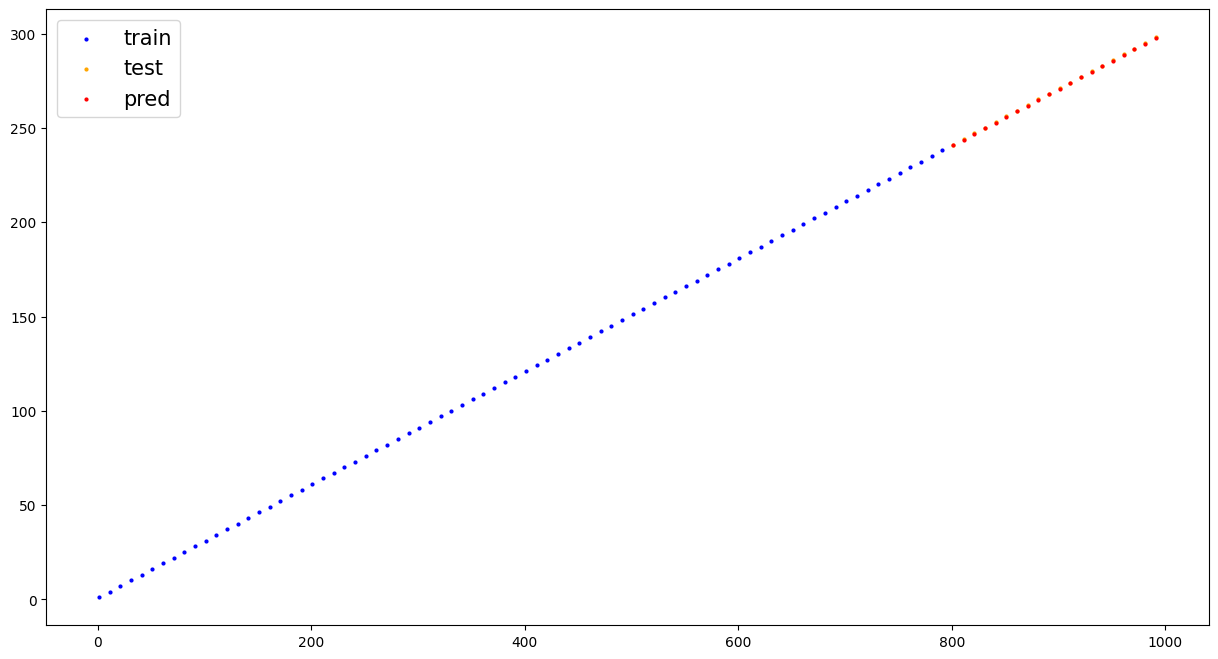

In [125]:
epochs=3000
x_train=x_train.to(device)
y_train=y_train.to(device)
x_test=x_test.to(device)
y_test=y_test.to(device)
for epoch in range(epochs):
    model_1.train()
    y_pred=model_1(x_train)
    loss=loss_fn(y_pred,y_train)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    model_1.eval()
    with torch.inference_mode():
        y_test_pred=model_1(x_test)
        test_loss=loss_fn(y_test_pred,y_test)
    if epoch % 10 == 0:
        print(f"Epoch: {epoch} | Train loss: {loss:.5f} | Test loss: {test_loss:.5f}")
plt.figure(figsize=(15,8))
plt.scatter(x_train.cpu(),y_train.cpu(),c="blue",s=4,label="train")
plt.scatter(x_test.cpu(),y_test.cpu(),c="orange",s=4,label="test")
plt.scatter(x_test.cpu(),y_test_pred.cpu(),c="red",s=4,label="pred")
plt.legend(prop={"size":15})
plt.show()


In [127]:
#save and load the model
from pathlib import Path
mode_path=Path("models")
mode_path.mkdir(parents=True,exist_ok=True)
model_1_save_path=mode_path/"model_1.pth"
torch.save(obj=model_1.state_dict(),f=model_1_save_path)
model_1_load=linearlayermodel()
model_1_load.load_state_dict(torch.load(model_1_save_path))
print(model_1_load.state_dict())


OrderedDict({'linear_layer.weight': tensor([[0.2996]]), 'linear_layer.bias': tensor([0.8286])})
